In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

from matplotlib import animation, rc
%matplotlib inline

## Bayes Rule
\begin{align}
p(\mu|x) = \frac{p(x|\mu)p(\mu)}{p(x)}
\end{align}
However, it is easier to express in the following form since the denominator is a constant that requires the numerator to integrate to one.
\begin{align}
p(\mu|x) \propto p(x|\mu)p(\mu)
\end{align}

Suppose we have a prior distribution that is (relatively uninformative) on $\mu$ (say normally distributed with a standard deviation of 20). And say that the true distribution was with a mean of 4 and the _observations_ had a standard deviation of 1. We will see in the following demonstration of how the mean converges to 4 and how the variance decreases.

### The mathemetical way
\begin{align}
p(\mu|x_1,...,x_N) &\propto p(x_1|\mu)p(x_2|\mu)...p(x_N|\mu)p(\mu)\\
&\propto\exp\left(-\frac{1}{2}\left((x_1-\mu)^2+(x_2-\mu)^2+...+(x_N-\mu)^2\right)\right)\exp\left(-\frac{1}{2}\frac{\mu}{20^2}\right)\\
&\propto\exp\left(\mu^2\left(N+\frac{1}{20^2}\right)-2\sum_{i=1}^Nx_i\mu\right)\\
& = \mathcal{N}\left(\frac{\sum x_i}{N+\frac{1}{20^2}},\frac{1}{N+\frac{1}{20^2}}\right)
\end{align}

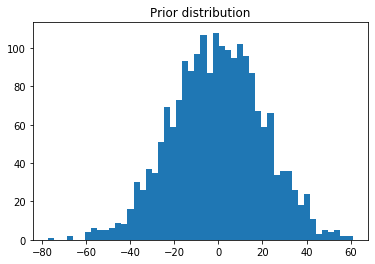

In [2]:
σ_μ = 20
μ = σ_μ * np.random.randn(2000) # prior distribution
plt.hist(μ, 50)
plt.title('Prior distribution')
plt.show()

In [0]:
sum_x = 0
N = 0

data = []
y = 4 + np.random.randn(100,1) #observations
for i in range(100):
    sample = y[i]
    sum_x += sample
    N += 1
    posterior_mean = sum_x/(N+1/σ_μ**2)
    posterior_var = 1/(N+1/σ_μ**2)
    posterior_samples = posterior_mean + np.sqrt(posterior_var) * np.random.randn(2000)
    data.append(posterior_samples)

In [4]:
fig, ax = plt.subplots()
plt.close()
ax.set_xlim(( -4, 8))
ax.set_ylim((-1,250))
line1, = ax.plot([], [], lw=2)
# animation function: this is called sequentially
def animate(i):
    n, bins = np.histogram(data[i], bins=100, range=(-5,5))
  
    line1.set_data(bins[:-1], n)
    return (line1,)
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
rc('animation', html='jshtml')
anim


## The Probabilistic programming way:
First write down the data model (in this case the data generation process):
\begin{align}
\mu &\sim \mathcal{N}(0, 20) \\
y &\sim \mathcal{N}(\mu, 1)
\end{align}

In [5]:
n_samples = 500

with pm.Model() as model:
    μ = pm.Normal('mu', mu=0, sd=σ_μ)
    likelihood = pm.Normal('y', mu=μ, sd=1, observed=y)
    trace = pm.sample(n_samples, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


TypeError: ignored

In [0]:
pm.traceplot(trace)

In [0]:
trace['mu'].shape

### Modified Model
\begin{align}
\mu &\sim \mathcal{N}(0, 20) \\
\sigma &\sim exp(\lambda) \\
y &\sim \mathcal{N}(\mu, \sigma)
\end{align}

In [0]:
with pm.Model() as model:
    μ = pm.Normal('mu', mu=0, sd=σ_μ)
    σ = pm.Exponential('sigma', lam=1/5)
    likelihood = pm.Normal('y', mu=μ, sd=σ, observed=y)
    trace = pm.sample(n_samples, njobs=4)

In [0]:
pm.traceplot(trace)
plt.show()